# `size_to_satn`
Converts values of invasion size into a saturation map

In [7]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
from edt import edt

ps.visualization.set_mpl_style()

Generate an image containing invasion sizes using the ``porosimetry`` function:

In [8]:
np.random.seed(0)
im = ps.generators.blobs([200, 200], porosity=0.5)
inv = ps.filters.porosimetry(im)

## `size`
The sizes are produced by ``porosimetry`` for instance:

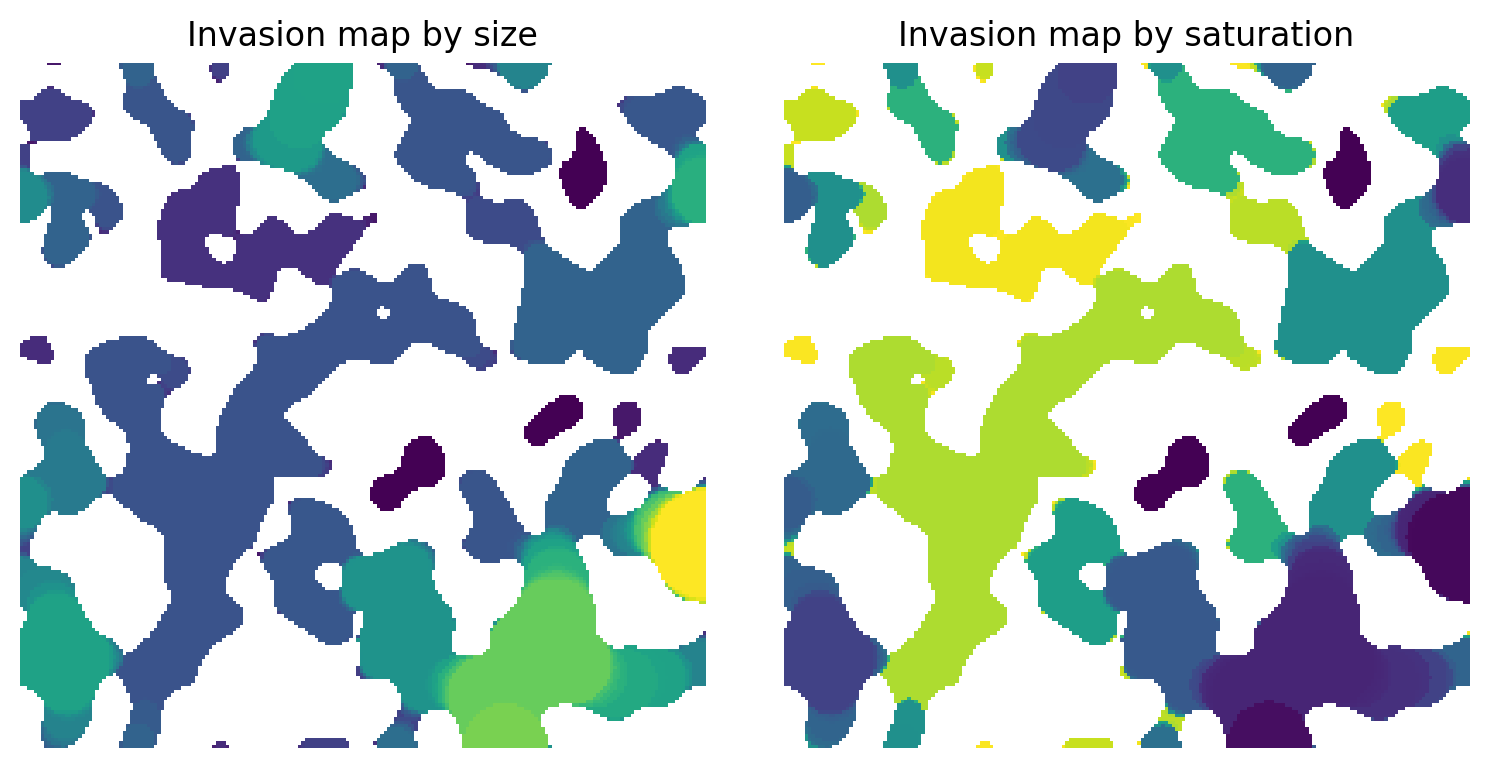

In [9]:
satn = ps.filters.size_to_satn(size=inv)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(inv / im, origin="lower", interpolation="none")
ax[0].set_title("Invasion map by size")
ax[0].axis(False)
ax[1].imshow(satn / im, origin="lower", interpolation="none")
ax[1].set_title("Invasion map by saturation")
ax[1].axis(False);

The saturation map makes it very easy to obtain a desired fluid configuration just by applying a threhold:

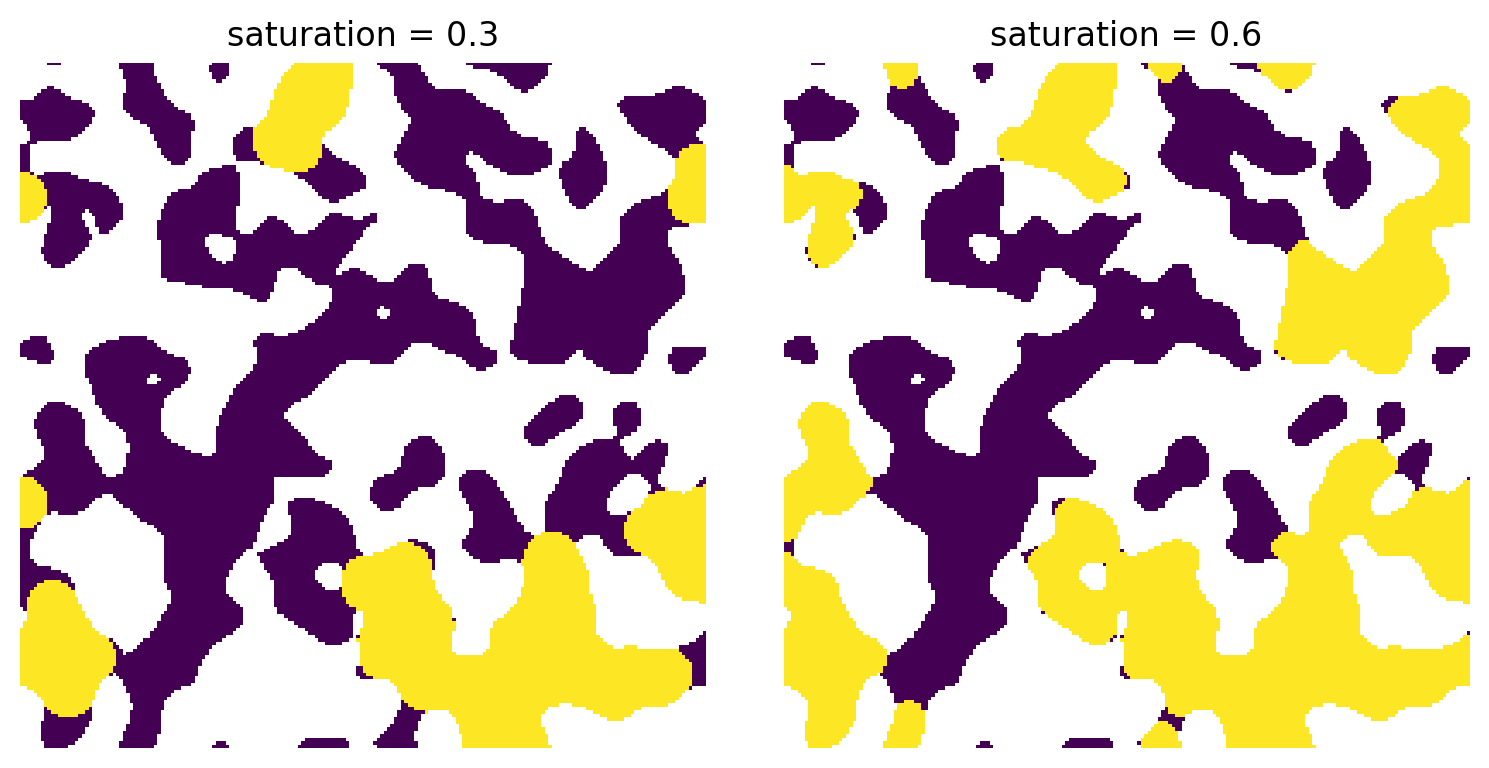

In [10]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

s = 0.3
ax[0].imshow((satn < s) * (satn > 0) / im, origin="lower", interpolation="none")
ax[0].set_title(f"saturation = {s}")
ax[0].axis(False)

s = 0.6
ax[1].imshow((satn < s) * (satn > 0) / im, origin="lower", interpolation="none")
ax[1].set_title(f"saturation = {s}")
ax[1].axis(False);

## `im`
The boolean image can be optionally passed into so that uninvaded regions can be differentiated from solid (if both are labelled 0).

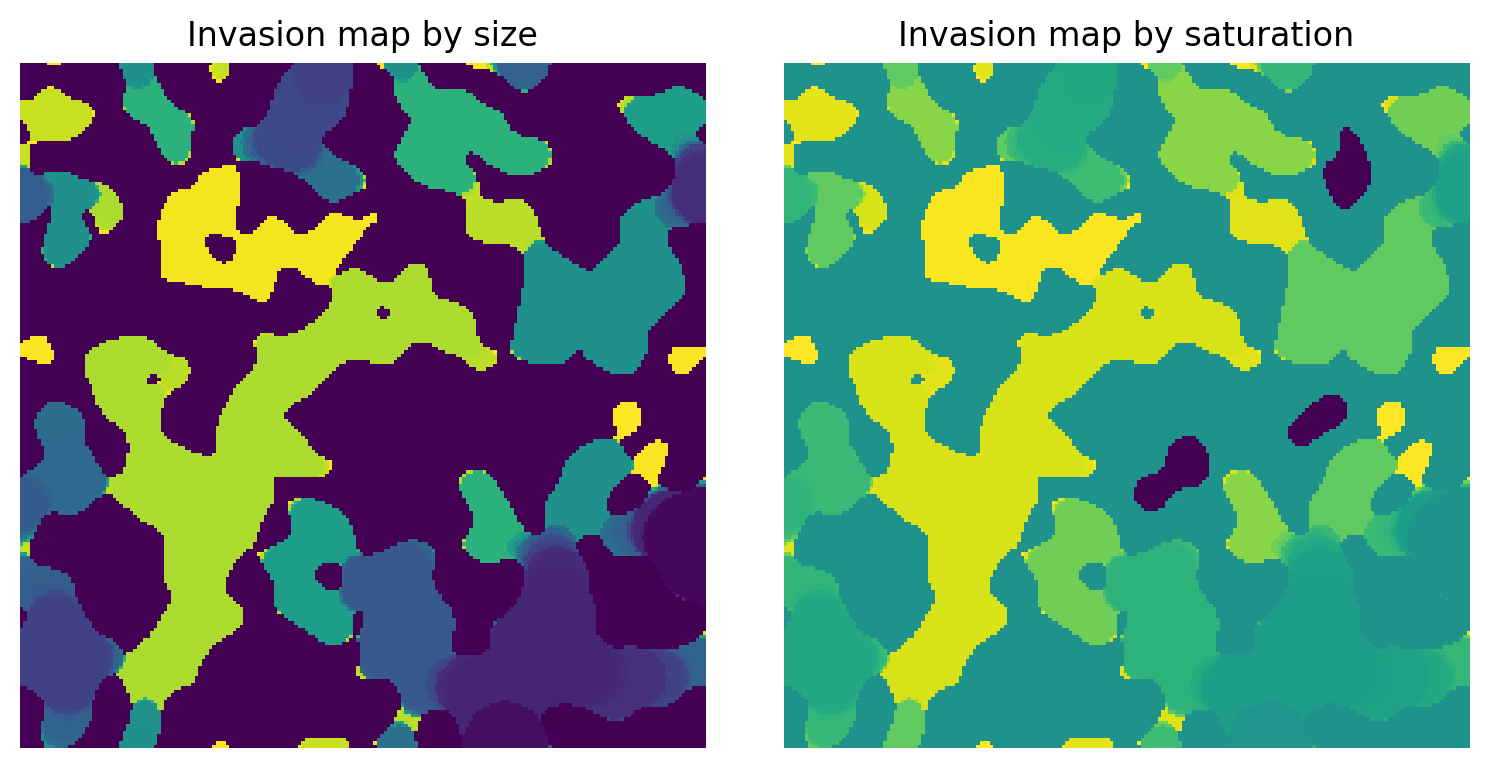

In [11]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

satn = ps.filters.size_to_satn(size=inv)
ax[0].imshow(satn, origin="lower", interpolation="none")
ax[0].set_title("Invasion map by size")
ax[0].axis(False)

satn = ps.filters.size_to_satn(size=inv, im=im)
ax[1].imshow(satn, origin="lower", interpolation="none")
ax[1].set_title("Invasion map by saturation")
ax[1].axis(False);

The different between the two images above is that when ``im`` is not supplied, then uninvaded regions are given a lable of 0, matching solid.  When ``im`` *is* supplied, the uninvaded regions are labelled -1.

## `bins`
The number of sequence values to when converting sizes. The default is 25.

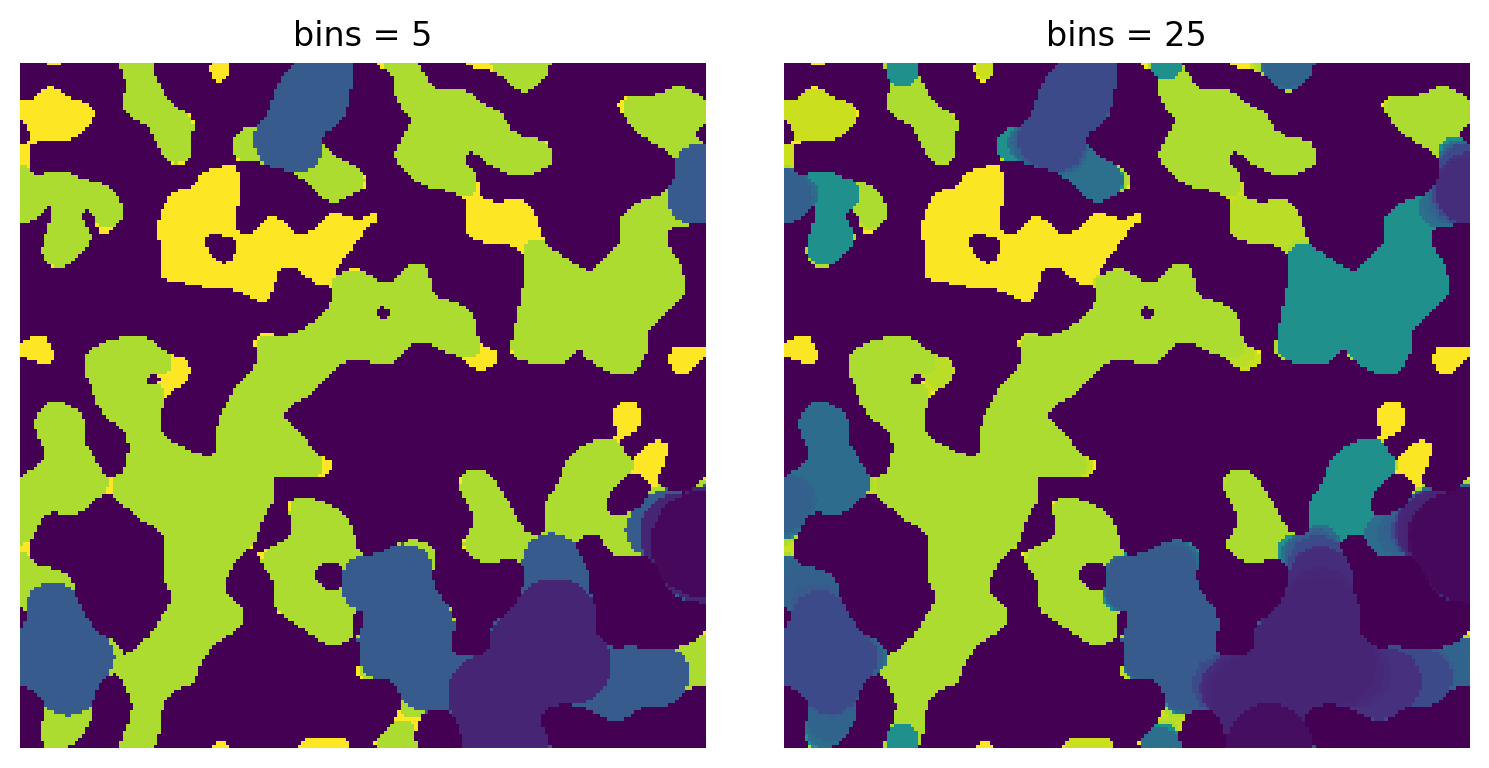

In [12]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

bins = 5
seq = ps.filters.size_to_satn(size=inv, bins=bins)
ax[0].imshow(seq, origin="lower", interpolation="none")
ax[0].set_title(f"bins = {bins}")
ax[0].axis(False)

bins = 25
seq = ps.filters.size_to_satn(size=inv, bins=bins)
ax[1].imshow(seq, origin="lower", interpolation="none")
ax[1].set_title(f"bins = {bins}")
ax[1].axis(False);